# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [9]:
import random
import numpy as np
from collections import defaultdict
from bisect import bisect_left

mu, std = 100, 10
for n in [10,100,1000,10000,1000000]:
    sample = np.random.normal(loc=mu, scale=std, size=n)
    m = 0
    for x in sample:
        if(mu-(2*std) <= x <= mu-std) or (mu+std<= x <= mu+(2*std)) :
            m += 1
    print(m/n)
    

0.1
0.27
0.261
0.2682
0.271502


<font color = 'green'> Correct : 10 points </font> 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution


I would have movies as index and users as columns so that I could calculate each movies overall average rating scores by rows. Attributes will be 1000 and 500 movies as rows so the dimension will 1000*500, so the dim then I can add one more for ex: average rating but for that I need to replace 0 with NA.
This will also help to see which users are correlated with each other
For example

In [119]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = {'user1'     : [1, 5, 1, 3],
        'user2'     : [1., 2., 3., 4.],
        'user3'     : [2., 1., 3., 0],
        'user4'     : [1., 1., 1., 5],
        'Movies'  : ["Matrix", "Cafe De Flore", "8 Mile", "law abiding citizen"]}
df = pd.DataFrame(data)
df.set_index(["Movies"],inplace=True)
df.replace(0, np.nan, inplace=True)
print(df.head())
df["Avg"] = df.mean(axis=1)
print(df.head())

                     user1  user2  user3  user4
Movies                                         
Matrix                   1    1.0    2.0    1.0
Cafe De Flore            5    2.0    1.0    1.0
8 Mile                   1    3.0    3.0    1.0
law abiding citizen      3    4.0    NaN    5.0
                     user1  user2  user3  user4   Avg
Movies                                               
Matrix                   1    1.0    2.0    1.0  1.25
Cafe De Flore            5    2.0    1.0    1.0  2.25
8 Mile                   1    3.0    3.0    1.0  2.00
law abiding citizen      3    4.0    NaN    5.0  4.00


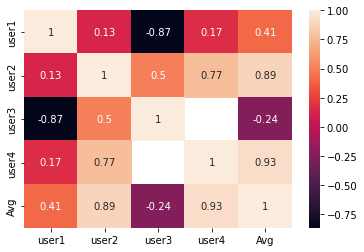

In [43]:
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

<font color = 'red'> Incorrect : 0 points </font> 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.


### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1.True

2.True

3.True

4.False  because noise always undesirable but outliers can desirable. <br>
5.To be decided

<font color = 'blue'> Partially Correct : 2 points </font>
2nd part  : False : Noise is never desirable. 
4th part  : True : Since noise objects can result from various factors, they may have attribute values very different from "good" samples, but not necessarily. 
5th part  : True : Outliers can come about because of genuine reasons - for example, swiping your credit card while on vacation. These are not noise and may in fact, be very important for the data analysis problem. Noise, on the other hands, is always undesirable.

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

carat - continues quantitative  ratio <br>
cut -  discrete  qualitative  ordinal <br>
color - discrete qualitative nominal<br>
clarity - discrete  qualitative  ordinal<br>
depth -  continues quantitative  ratio<br>
table -  continues quantitative  ratio<br>
price -  continues quantitative  ratio<br>	
x-continues quantitative  ratio<br>	
y-continues quantitative  ratio<br>	
z-continues quantitative  ratio<br>

<font color = 'blue'> Partially Correct : 4.5 points </font> 
Color: Discrete Qualitative Ordinal 

#### Solution 4.2

In [49]:
diom = pd.read_csv("diamonds.csv",index_col=0)
diom.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.3

Calculate summary statistics: a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points) b. For each qualitative attribute, find the mode. (1.5 points) c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)

In [71]:
print(diom[['carat','depth','table','price','x','y','z']].mean())
print(diom[['carat','depth','table','price','x','y','z']].median())
print(diom[['carat','depth','table','price','x','y','z']].std())


carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64
carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64
carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64


In [76]:

diom[['carat','depth','table','price','x','y','z']].apply(lambda x: x.max()-x.min())

carat        4.81
depth       36.00
table       52.00
price    18497.00
x           10.74
y           58.90
z           31.80
dtype: float64

In [77]:
diom[['cut','color','clarity']].mode()

,cut,color,clarity
0,Ideal,G,SI1


In [79]:
q3, q1 = np.percentile(diom['price'], [75 ,25])
iqr = q3 - q1
print(iqr)

4374.25


<font color = 'green'> Correct : 5.5 points </font> 

#### Solution 4.4

What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)

In [89]:
sum(diom['cut'].isin(['Very Good', 'Premium', 'Ideal']))/len(diom)

0.8791991101223582

C:\Users\tadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


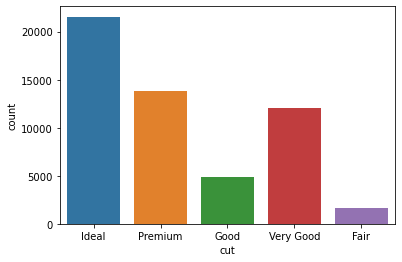

In [107]:
sns.countplot(diom['cut'])
plt.show()

<font color = 'green'> Correct : 2.5 points </font> 

5. Plot a histogram of the 'carat' variable. (2 points)

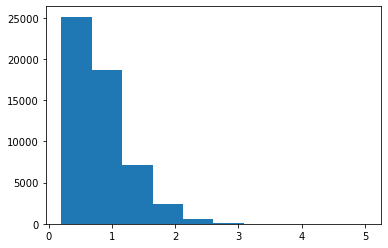

In [97]:
plt.hist(diom['carat'])
plt.show()

<font color = 'green'> Correct : 2 points </font> 

6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)


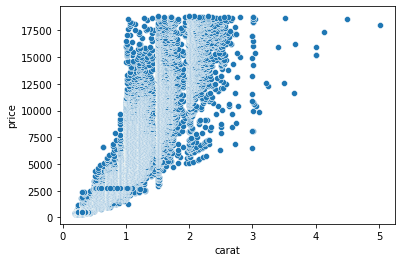

In [99]:
sns.scatterplot(data=diom, x="carat", y="price")
plt.show()

<font color = 'green'> Correct : 2 points </font> 

7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

In [100]:
diom[['carat','price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


<font color='green'> Correct : 1 point </font> 

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

Cosine similarity is the best choice for this kind of problem as it can compare vectors with different sizes. Here we might have 2 words where some words may occur in one documents but not occur in the other. Cosine Similarity might help as deals with different size vectors

In [7]:
def cosine(x,y):# x and y are vectors
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

<font color = 'green'> Correct : 2 points </font> 
However, different size vectors cannot be used in dot product. 
(If you are talking about one-hot encoding, still the length needs to be the same.)
And please write the formula next time and not the code if formula is asked for. 

#### Solution 5.2

It will take into words that occur in every document, so we will get information how important is id the word for given document, if it is comparebly unique in that doc the score will be higher, if it happens in other  docs it will lower the score.

In [276]:
#pretend we have data with n*n where n are number of docs M are words we want to have new matrix populatee with td-iff scores.
# tf_idf = np.zeros((n,m))
# for i in range(n):
#     for in range(n):
#        tf_idf[i,j] = data.iloc[i,j]* np.log(n/sum(data.loc[data[j]>0])) we sum here because values are True and false and it is true words occur  in docyument

<font color = 'green'> Correct : 2 points </font> 
The size must be n * m and not  n * n. 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

Hamming

In [32]:
x = [1,0,1,0,1,0,1,0,1,0,1,0,1]
y = [1,0,0,0,1,0,0,0,1,0,0,0,1]
def calc_hamming(x,y):
    count =  0
    for i,j in zip(x,y):
        if i!=j:
            count+=1
    print(count/len(x))
calc_hamming(x,y)

0.23076923076923078


SMC

In [33]:
def calc_smc(x,y):
    count =  0
    for i,j in zip(x,y):
        if i==j:
            count+=1
    print(count/len(x))
calc_smc(x,y)

0.7692307692307693


Jaccard 

In [34]:
def calc_Jaccard(x,y):
    count =  0
    numbers_to_be_reduced = 0
    for i,j in zip(x,y):
        if i==1 and j==1:
            count+=1
        if i==0 and j==0:
            numbers_to_be_reduced+=1
    print(count/(len(x)-numbers_to_be_reduced))


In [35]:
calc_Jaccard(x,y)

0.5714285714285714


<font color = 'blue'>Partially correct : 4 points </font>
Hamming distance is incorrect. Do not divide by the len(x). Just count will be your answer. 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [13]:
def euclidiean(a,b):
    a,b = np.array(a),np.array(b)
    return np.sqrt(np.sum(np.square(a-b)))

def covariance(a,b):
    a,b = np.array(a),np.array(b)
    cov = np.dot((a - np.mean(a)),(b - np.mean(b)))/(len(a)-1)
    return cov 

def std(data):
    """Return sum of square deviations of sequence data."""
    data = np.array(data)
    c = np.mean(data)
    std = np.sqrt(sum((x-c)**2 for x in data))
    return std

def correlation(a,b):
    a,b = np.array(a),np.array(b)
    return (covariance(a, b) / (std(a) * std(b)))

def l_max(x,y):
    return max([abs(i-j) for i,j in zip(x,y)])

        
    
    
    


In [14]:
x=[1,1,1,1]
y = [3,3,3,3]

In [15]:
print(cosine(x,y),euclidiean(x,y),correlation(x,y)),

1.0 4.0 nan


<ipython-input-13-80b7ab2519f2>:19: RuntimeWarning: invalid value encountered in double_scalars
  return (covariance(a, b) / (std(a) * std(b)))


(None,)

In [24]:
x = [0,1,0,1,0,1]  
y = [1,0,1,0,1,0]

In [25]:
print(cosine(x,y),euclidiean(x,y),correlation(x,y),calc_Jaccard(x,y))

0.0
0.0 2.449489742783178 -0.2 None


In [38]:
x = [1,1,0,1,0,1]  
y = [1,1,1,0,0,1]  
print(cosine(x,y),correlation(x,y),l_max(x,y),calc_Jaccard(x,y))

0.6
0.75 0.049999999999999996 1 None


<font color = 'blue'>Partially Correct : 4 points </font>
I do not understand your prints at all. Why are the Jaccard coefficients getting printed at first line and rest at bottom. Then it shows None for some reason for the Jaccard in the next line?

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color = 'green'> Total points: 43.5 points </font> 